# 1.1.1 Сводная (описательная) статистика


## 1. Меры Местоположения или Центрированности

Эти меры описывают центральную точку распределения. (Если распределение симметричное, все три характеристики равны)

### Среднее значение (ср арифм.) $ \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$
* Сумма всех значений, деленная на их количество. Является **центром тяжести** распределения. Это самая распространенная мера, но она **очень чувствительна к выбросам** (outliers).

### Математическое ожидание $E[X] = \sum_{i} x_i p_i$
* **Теоретическое среднее** значение случайной величины (параметр **генеральной совокупности**). В задачах ML выборочное среднее ($\bar{x}$) используется как его лучшая оценка.

### Медиана (Не подвержена "выбросам", инструмент для избавления от "выбросов")
* Значение, которое делит отсортированный набор данных ровно пополам (50-й перцентиль). Главное преимущество — ее **устойчивость (Robustness)** к экстремальным значениям. Если распределение скошено, медиана является более репрезентативной мерой.

### Мода
* Наиболее часто встречающееся значение в наборе данных. Это единственная мера центрированности, применимая для **номинальных (категориальных)** данных. Распределение может быть бимодальным (иметь две моды) или мультимодальным.


## 2. Меры Разброса или рассеивания/местоположения

Эти меры описывают вариативность данных — насколько значения данных удалены от центральной точки (например, от среднего).

---

### Дисперсия случайной величины (Variance, $\sigma^2$)
$$\sigma^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 = \mu_2$$
* Средний квадрат отклонений значений от среднего. Из-за возведения в квадрат, **единица измерения** отличается от исходной. Она **чувствительна к выбросам** (так как зависит от среднего $\bar{x}$), что делает ее менее надежной для скошенных распределений.

### Среднеквадратическое отклонение (Standard Deviation, $\sigma$)
$$\sigma = std = \sqrt{\sigma^2}$$
* Квадратный корень из дисперсии. Имеет ту же **единицу измерения**, что и исходные данные, что делает ее наиболее популярной и **интерпретируемой** мерой разброса. В предположении нормального распределения, $\sim 95\%$ данных лежит в пределах $\bar{x} \pm 2s$.

### Интерквантильный размах (Interquartile Range, IQR)
$$IQR = Q_3 - Q_1$$
* Разница между 75-м перцентилем ($Q_3$) и 25-м перцентилем ($Q_1$). Главное преимущество — **устойчивость к выбросам (Robustness)**. IQR описывает разброс **центральных 50%** данных и используется как основа для построения Box Plot и обнаружения выбросов (правило $1.5 \times IQR$).

### Размах вариации (Range, $R$)
$$R = X_{max} - X_{min}$$
* Разница между максимальным ($X_{max}$) и минимальным ($X_{min}$) значениями. Эта мера **крайне чувствительна к выбросам**, так как зависит только от двух крайних точек.

### Минимум, Максимум (Экстремальные значения)
* Самые низкие и самые высокие значения. Критически важны для проверки **качества данных** (ошибки, невозможные значения) и определения границ распределения.

### Доверительный интервал (Confidence Interval)
* Диапазон, который с заданной вероятностью (часто 95%) содержит истинный параметр генеральной совокупности (например, $\mu$). Это мера относится к **статистическому выводу**, а не только к описанию данных.

## 3. Меры Формы

Эти меры описывают внешний вид распределения — его симметрию и "тяжесть хвостов" по сравнению с нормальным распределением.

---

### Коэффициент асимметрии (Skewness, $g_1$)
$$g_1 = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^3}{s^3} = \frac{\mu_3}{\sigma^3}$$
* **Мера:** Степень несимметричности распределения относительно среднего.
* **Интерпретация:**
    * $g_1 \approx 0$: Распределение симметрично (как нормальное).
    * $g_1 > 0$: **Положительная (правая) асимметрия**. "Хвост" тянется вправо. Обычно Mean > Median.
    * $g_1 < 0$: **Отрицательная (левая) асимметрия**. "Хвост" тянется влево. Обычно Mean < Median.

### Коэффициент перекоса (Эксцесс, Kurtosis, $g_2$)
$$g_2 = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^4}{s^4} - 3 = \frac{\mu_4}{\sigma^4} - 3$$
* **Мера:** Описывает "тяжесть хвостов" и "остроту пика" (концентрацию данных в центре и на краях).
* **Интерпретация:** Используется **Эксцесс Фишера** (где нормальное распределение $= 0$).
    * $g_2 > 0$ (**Лептокуртическое**): Пик острее, хвосты тяжелее, чем у нормального. **Указывает на наличие выбросов**.
    * $g_2 \approx 0$ (**Мезокуртическое**): Как нормальное распределение.
    * $g_2 < 0$ (**Платикуртическое**): Пик более плоский, хвосты легче.

# 1.1.2 Визуализация: Ключевые Графики для EDA

Визуализация — это **глаза EDA**. Это инструмент для **валидации** числовых метрик (Mean/Median/Skewness) и быстрого обнаружения **паттернов, ошибок и выбросов**.

---

### Графики для Одномерного Распределения (Univariate)

#### Гистограмма (Histogram)
* **Назначение:** Оценка формы и частоты распределения одной непрерывной переменной.
* **Что показывает:** Наличие **нормальности, асимметрии (skewness)** и **мультимодальности** (несколько пиков).

#### KDE Plot (Kernel Density Estimate)
* **Назначение:** Сглаженная оценка функции плотности вероятности.
* **Что показывает:** То же, что и гистограмма, но результат не зависит от выбора **ширины бина**. Идеален для визуального **сравнения** двух распределений.

#### Box Plot (Ящик с усами)
* **Назначение:** Быстрый анализ центральной тенденции, разброса (IQR) и **выбросов**.
* **Что показывает:** Медиану (линия внутри), IQR (диапазон ящика) и **выбросы (Outliers)**, которые отображаются отдельными точками. **Незаменим** для сравнения разброса между категориями.

#### Violin Plot
* **Назначение:** Сочетает Box Plot с KDE.
* **Что показывает:** Плотность распределения (как KDE) и ключевые статистики (как Box Plot: медиана, квартили). Дает более полное представление о форме распределения.

---

### Графики для Связи Переменных (Bivariate / Multivariate)

#### Scatter Plot (Диаграмма рассеяния)
* **Назначение:** Оценка связи (корреляции) между **двумя непрерывными** переменными.
* **Что показывает:** Направление и сила **линейной** или **нелинейной** взаимосвязи. Позволяет увидеть **кластеры** или аномальные точки.

#### Hexbin Plot
* **Назначение:** Замена Scatter Plot для **очень больших** наборов данных (миллионы точек).
* **Что показывает:** Плотность точек в определенной шестиугольной области. Цвет ячейки показывает, сколько наблюдений попало в эту зону (решает проблему "перекрытия" точек).

#### Парные графики (Pair Plot / PairGrid)
* **Назначение:** Комплексный обзор взаимосвязей между **всеми парами** числовых признаков в датасете.
* **Что показывает:** Матрица графиков, где на диагонали расположены распределения, а вне диагонали — диаграммы рассеяния. **Отличный первый шаг** для многомерного EDA.

---

--- 1. Одномерное Распределение (Income) ---


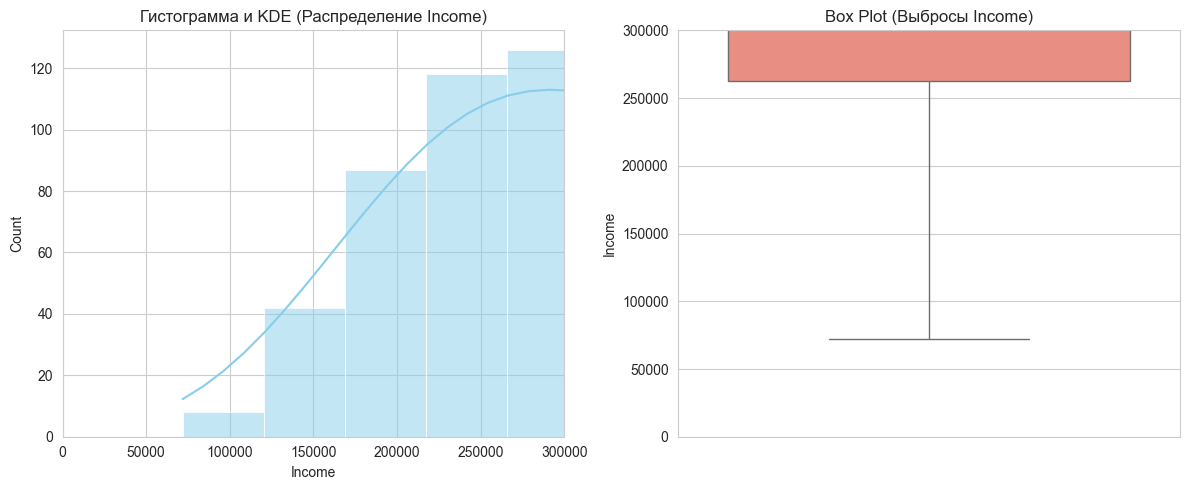


--- 2. Сравнение Групп (Violin Plot) ---


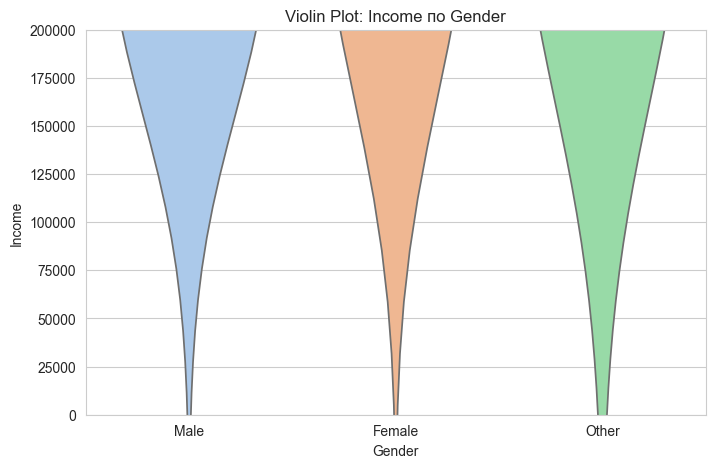


--- 3. Связь Переменных (Scatter Plot) ---


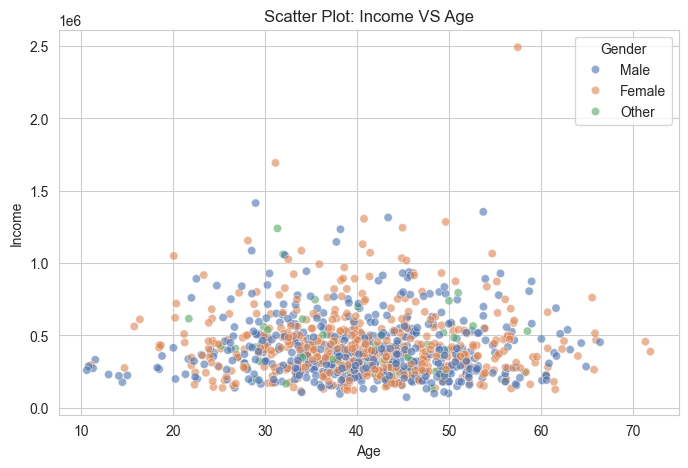


--- 4. Многомерный Обзор (Pair Plot) ---


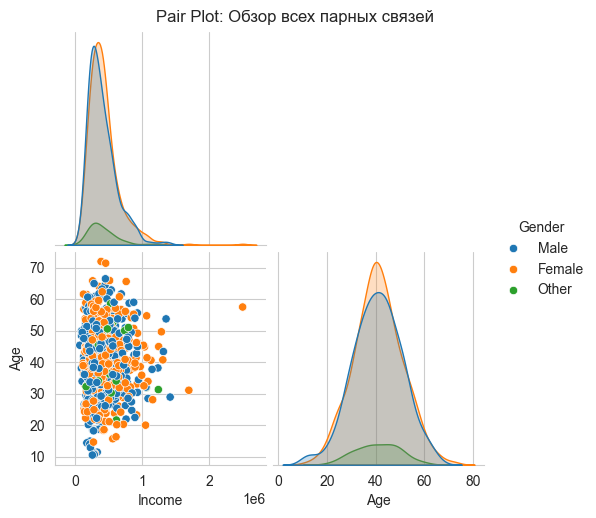

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

np.random.seed(42)
N = 1000
income = np.random.lognormal(mean=10.5, sigma=0.5, size=N) * 10
age = np.random.normal(loc=40, scale=10, size=N)
gender = np.random.choice(['Male', 'Female', 'Other'], size=N, p=[0.45, 0.5, 0.05])
df = pd.DataFrame({'Income': income, 'Age': age, 'Gender': gender})

print("--- 1. Одномерное Распределение (Income) ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True, bins=50, color='skyblue')
plt.title('Гистограмма и KDE (Распределение Income)')
plt.xlim(0, 300000)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Income'], color='salmon')
plt.title('Box Plot (Выбросы Income)')
plt.ylim(0, 300000)
plt.tight_layout()
plt.show()

print("\n--- 2. Сравнение Групп (Violin Plot) ---")
plt.figure(figsize=(8, 5))
sns.violinplot(x='Gender', y='Income', data=df, inner='quartile', hue='Gender', legend=False, palette='pastel')
plt.title('Violin Plot: Income по Gender')
plt.ylim(0, 200000)
plt.show()

print("\n--- 3. Связь Переменных (Scatter Plot) ---")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Income', data=df, hue='Gender', alpha=0.6, palette='deep')
plt.title('Scatter Plot: Income VS Age')
plt.show()

print("\n--- 4. Многомерный Обзор (Pair Plot) ---")
sns.pairplot(df[['Income', 'Age', 'Gender']], hue='Gender', corner=True, diag_kind='kde')
plt.suptitle('Pair Plot: Обзор всех парных связей', y=1.02)
plt.show()

# 1.1.3 Корреляции и Ассоциации

Анализ связей позволяет выявить **избыточные (мультиколлинеарные)** признаки, которые нужно удалять, и найти **взаимосвязи** с целевой переменной.

---

### Корреляции для Числовых (Непрерывных) Признаков

Эти коэффициенты измеряют связь между двумя числовыми переменными.

#### Коэффициент корреляции Пирсона ($r$)
$$r_{XY} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2 \sum(y_i - \bar{y})^2}} = \frac{cov_{XY}}{\sigma_X\sigma_Y}$$
* **Мера:** Измеряет силу **линейной** взаимосвязи. **Чувствителен к выбросам** и требует нормального распределения.
* **Диапазон:** $[-1; 1]$. Значение 0 означает отсутствие *линейной* связи.

#### Коэффициент корреляции Спирмена ($\rho$)
* **Формула:** Коэффициент Пирсона, примененный к **рангам** (порядковым номерам) данных, а не к самим значениям.
* **Мера:** Измеряет **монотонную** взаимосвязь (когда одна переменная увеличивается, другая либо всегда увеличивается, либо всегда уменьшается). **Нечувствителен к выбросам**.

#### Коэффициент корреляции Кендалла ($\tau$)
* **Формула:** Основан на количестве **согласованных** и **несогласованных** пар наблюдений.
* **Мера:** Альтернатива Спирмену для **ранговой** корреляции. Лучше подходит для небольших выборок с большим количеством совпадающих значений (связей).

---

### Меры Ассоциации для Категориальных Признаков

Эти коэффициенты измеряют силу связи между двумя категориальными переменными.

#### Коэффициент Крамера V (Cramér’s V)
$$V = \sqrt{\frac{\chi^2 / N}{\min(k-1, r-1)}}$$
* **Мера:** Описывает силу ассоциации (связи) между **номинальными** признаками в таблице сопряженности.
* **Диапазон:** $[0; 1]$. Значение 0 означает отсутствие связи, 1 — полную зависимость.

#### Коэффициент Тейла U (Theil’s U)
* **Мера:** Измеряет долю уменьшения неопределенности (энтропии) одной переменной, зная другую. Основан на информации (энтропии).
* **Свойство:** **Асимметричен**. $U(X|Y) \ne U(Y|X)$. Показывает, насколько хорошо $Y$ помогает предсказать $X$.
* **Диапазон:** $[0; 1]$.

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# --- 1. Вспомогательная функция для Cramér’s V ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) 
    chi2 = chi2_contingency(confusion_matrix)[0] # хи квадрат
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    v = np.sqrt(phi2 / min(k - 1, r - 1))
    return v

# --- 2. Генерация данных (Income/Age/Gender) ---
np.random.seed(42)
N = 1000
# Income: с правым хвостом
income = np.random.lognormal(mean=10.5, sigma=0.5, size=N) * 10 
age = np.random.normal(loc=40, scale=10, size=N) 
gender = np.random.choice(['Male', 'Female', 'Other'], size=N, p=[0.45, 0.5, 0.05])
# New Categorical Feature: High_Income (бинарный признак)
high_income = (income > np.percentile(income, 75)).astype(int) 

df = pd.DataFrame({'Income': income, 'Age': age, 'Gender': gender, 'High_Income': high_income})


print("---  Корреляции Числовых Признаков (Income, Age) ---")
# Создаем матрицу корреляций для наглядности
corr_matrix = df[['Income', 'Age']].corr(method='pearson')
print("Пирсон (Линейная):")
print(corr_matrix.loc['Income', 'Age'] )
# Результат: низкая линейная корреляция

corr_matrix_spearman = df[['Income', 'Age']].corr(method='spearman')
print("\nСпирмен (Ранговая, Монотонная):")
print(corr_matrix_spearman.loc['Income', 'Age'])
# Результат: Ранговая корреляция выше, так как логнормальное распределение не является линейным.

print("\n---  Ассоциация Категориальных Признаков (Gender, High_Income) ---")
# Расчет Cramér’s V
v_score = cramers_v(df['Gender'], df['High_Income'])
print(f"Cramér’s V (Gender <-> High_Income): {v_score:.3f}")


---  Корреляции Числовых Признаков (Income, Age) ---
Пирсон (Линейная):
-0.02527196563968857

Спирмен (Ранговая, Монотонная):
-0.06376473976473976

---  Ассоциация Категориальных Признаков (Gender, High_Income) ---
Cramér’s V (Gender <-> High_Income): 0.018


# 1.1.4 Анализ пропусков и выбросов; оценка утечек признаков (data leakage).

Этот этап критически важен, так как он определяет, насколько хорошо модель сможет обобщать данные. Начинаем с оценки качества.

---

### Анализ Пропусков (Missing Values)

* **Цель:** Выявить, где и почему данные отсутствуют, и определить оптимальную стратегию импутации или удаления.
* **Типы пропусков:**
    * **MCAR (Missing Completely at Random):** Пропуски не зависят ни от каких данных (например, технический сбой). Лучший сценарий.
    * **MAR (Missing at Random):** Пропуски зависят от *известных* данных (например, мужчины реже указывают доход). Можно моделировать.
    * **MNAR (Missing Not at Random):** Пропуски зависят от *самого пропущенного значения* (например, очень богатые люди скрывают доход). Худший сценарий.

* **Виды анализа:**
    * **Количественный:** Процент пропусков в каждом столбце.
    * **Визуальный:** Графики `msno.matrix()` или `msno.bar()` (из библиотеки `missingno`).
    * **Попарный:** Оценка корреляции пропусков между разными признаками.

---

### Анализ Выбросов (Outliers)

* **Цель:** Идентифицировать экстремальные значения, которые могут сильно исказить обучение моделей, чувствительных к расстояниям (Линейная регрессия, KNN, K-Means).
* **Методы обнаружения:**
    * **Визуализация:** Box Plot (использование правила $1.5 \times IQR$).
    * **Статистические:** **Z-score** (для нормально распределенных данных, порог $\pm 3$) или **IQR-метод** (для скошенных данных).
    * **Модельные:** **Isolation Forest** или **One-Class SVM** (для многомерного обнаружения).
* **Стратегии обработки:**
    * **Удаление:** Только если выброс является ошибкой измерения.
    * **Трансформация:** Применение логарифма или корня (сжимает хвосты).
    * **Винсоризация (Capping):** Ограничение значений на уровне, например, 5-го и 95-го перцентилей.

---

### Оценка Утечек Признаков (Data Leakage)

* **Цель:** Гарантировать, что модель не использует информацию, которая будет недоступна во время реального предсказания. **Утечка приводит к переобучению и неверной оценке качества.**
* **Типы утечек:**
    * **Утечка на уровне разделения (Train-Test Contamination):** Использование данных из **тестового** набора для предобработки (масштабирование, импутация, кодирование) **тренировочного** набора.
    * **Утечка на уровне времени (Temporal Leakage):** Использование будущей информации для предсказания прошлого (критично для временных рядов).
* **Правило:** **Все операции предобработки** должны быть обучены **только** на тренировочном наборе (`train_data.fit()`) и затем применены к тестовому набору (`test_data.transform()`).

--- 1. Анализ Пропусков: Начальная проверка ---
Income    10.0
Age        5.0
dtype: float64


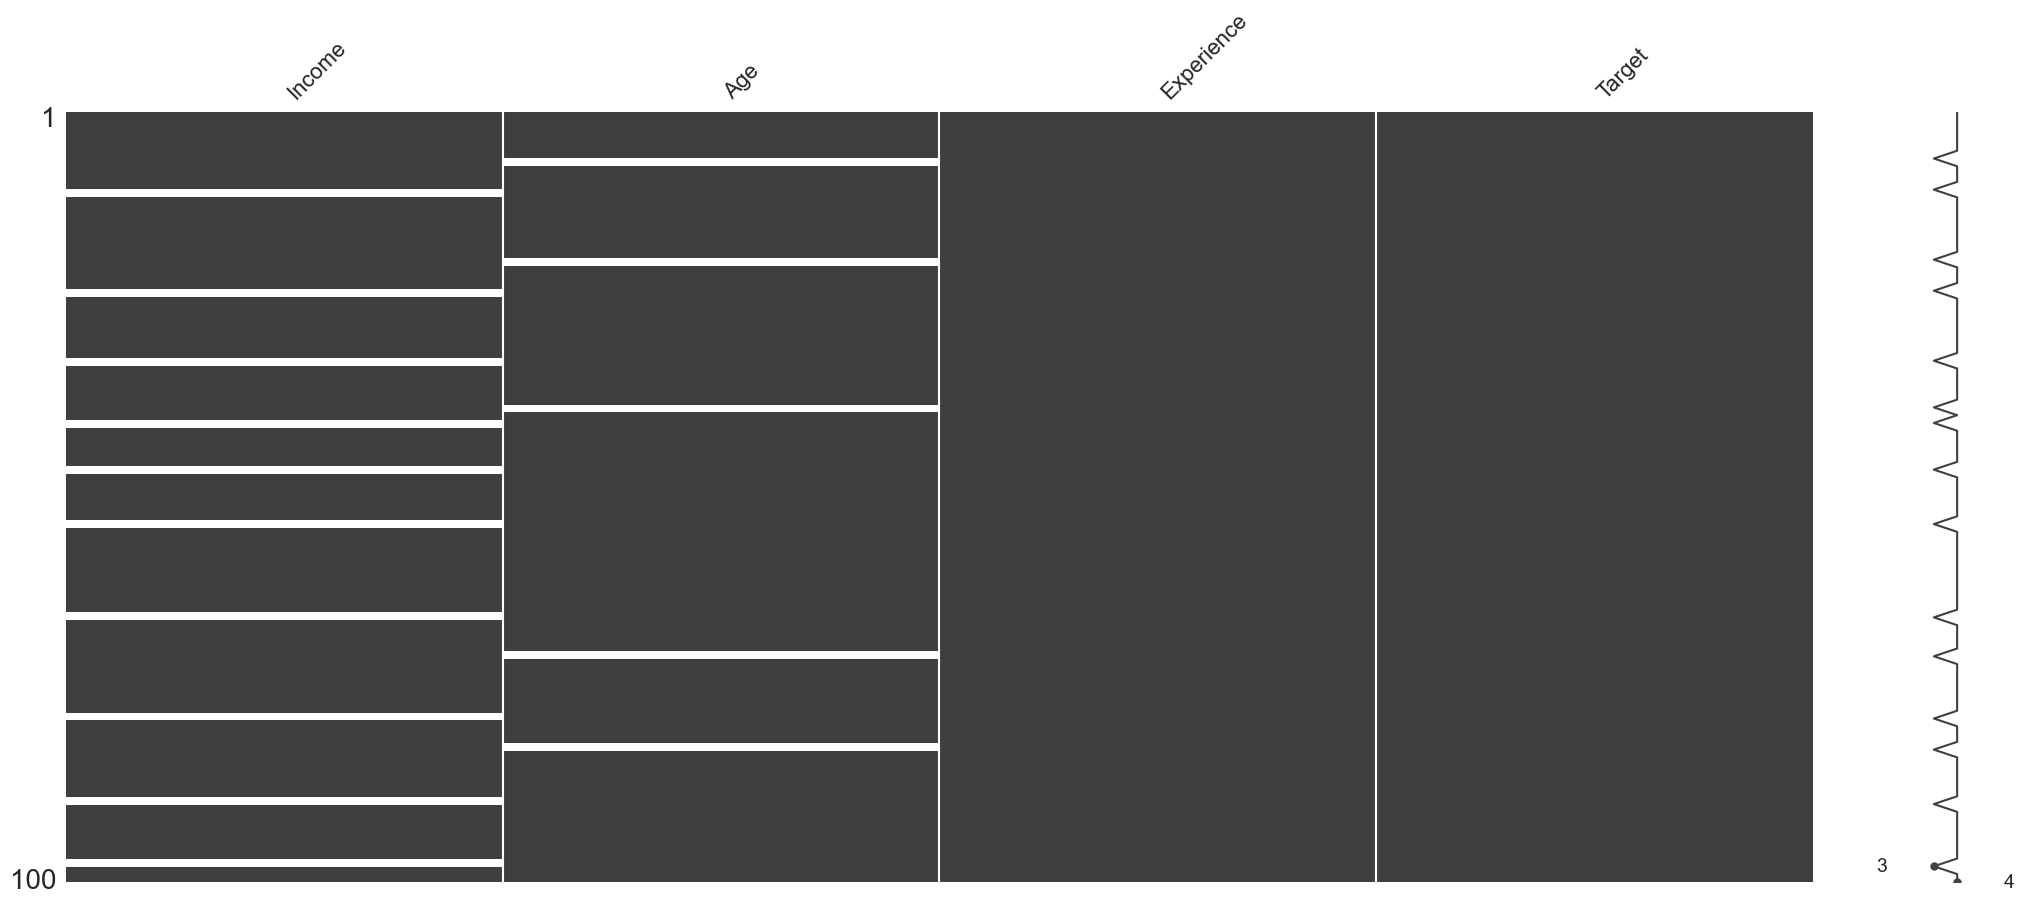


--- 2. Анализ Выбросов: IQR-метод для Income ---
Количество выбросов (IQR): 2

--- 3. Оценка Утечки Признаков (Conceptual Leakage) ---
Масштабирование выполнено корректно: Scaler обучен только на train_data.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from scipy.stats import zscore

# --- 1. Генерация данных с пропусками и выбросами ---
np.random.seed(42)
N = 100
df = pd.DataFrame({
    'Income': np.random.normal(50000, 15000, N),
    'Age': np.random.normal(40, 10, N),
    'Experience': np.random.randint(0, 20, N),
    'Target': np.random.randint(0, 2, N)
})
# Вносим искусственные пропуски
df.loc[df.sample(frac=0.10).index, 'Income'] = np.nan 
df.loc[df.sample(frac=0.05).index, 'Age'] = np.nan 
# Вносим искусственный выброс
df.loc[99, 'Income'] = 500000  

print("--- 1. Анализ Пропусков: Начальная проверка ---")
# Процент пропусков в каждом столбце
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent[missing_percent > 0])

import missingno as msno
msno.matrix(df)
plt.show()


print("\n--- 2. Анализ Выбросов: IQR-метод для Income ---")
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вывод выбросов
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Количество выбросов (IQR): {len(outliers)}")

# Альтернатива: Z-Score метод (для нормально распределенных данных)
# outliers_z = df[(np.abs(zscore(df['Income'].dropna())) > 3)]


print("\n--- 3. Оценка Утечки Признаков (Conceptual Leakage) ---")
# ПЛОХОЙ КОД: Утечка данных при масштабировании
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 1. Масштабирование ВСЕХ данных (включая тестовый набор) - LEAKAGE!
df_scaled_bad = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=np.number).fillna(df.mean())), columns=df.select_dtypes(include=np.number).columns)

# 2. Правильный подход: Масштабирование только на TRAIN
df_train, df_test = train_test_split(df.copy(), test_size=0.2, random_state=42)

# Обучаем scaler ТОЛЬКО на тренировочном наборе
scaler_good = MinMaxScaler()
scaler_good.fit(df_train[['Income']]) 

# Применяем к TRAIN и TEST
df_train['Income_scaled'] = scaler_good.transform(df_train[['Income']])
df_test['Income_scaled'] = scaler_good.transform(df_test[['Income']]) 

print("Масштабирование выполнено корректно: Scaler обучен только на train_data.")


# 1.1.5 Профилирование датасетов и Репорты Качества

Профилирование — это **автоматизация EDA**. Оно позволяет получить всесторонний отчет о качестве данных (пропуски, выбросы, распределения, корреляции) с помощью одной команды.

---

### Профилирование Датасетов и Инструменты

* **Цель:** Быстро оценить качество, распределение и потенциальные проблемы (высокая асимметрия, высокая корреляция, высокая уникальность/кардинальность) **всех признаков** в одном репорте.
* **Ключевые Инструменты:**
    * **`ydata-profiling` (бывший pandas-profiling):** Стандарт отрасли. Генерирует интерактивный HTML-отчет, покрывающий все аспекты EDA, включая предупреждения (warnings) о проблемах.
    * **`Sweetviz`:** Генерирует быстрые, красивые HTML-отчеты. Отлично подходит для визуального сравнения обучающего и тестового наборов.

* **Что включает Репорт Качества:**
    * **Обзор:** Количество переменных, наблюдений, дубликатов, пропущенных значений.
    * **Статистика:** Все метрики (Mean, Median, Skewness, Kurtosis).
    * **Визуализация:** Гистограммы, KDE и Box Plots для каждого признака.
    * **Корреляции:** Матрицы Пирсона, Спирмена и Крамера V.
    * **Предупреждения:** Список всех проблем, требующих внимания (например, `Income` имеет Skewness > 1.5).

